In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

In [9]:
def loadInput(particle, variable_list, index):

    # define particle_prefix based on particle type
    if particle == "Electron": 
        particle_prefix = "ele"
    elif particle == "Positron":
        particle_prefix = "pos"
    elif particle == "Neutron":
        particle_prefix = "neu"

    data = [] # empty data list
    for var in variable_list:

        dirname = "../files/input_geant4/gamma/{}/".format(particle) # name of directory
        filename = "{}_gamma_{}_{}.data".format(particle_prefix, index, var) # name of file
        fullname = dirname + filename # complete filename
        data.append(np.loadtxt(fullname)) # add variable to list

    data = np.array(data).T # transpose data to fit pandas
    df = pd.DataFrame(data, columns=variable_list) # create pandas dataframe
    return df

def plotSampleQuiver(ax, data, samples):
    x,y,z,vx,vy,vz = data

    i = np.maximum(int(len(x)/samples),1)
    ax.quiver(x[::i],y[::i],z[::i],vx[::i],vy[::i],vz[::i], length = 4, normalize = True)
    
    return ax

def getQuantities(Particle):

    x = Particle["x"]
    y = Particle["y"]
    z = Particle["z"]
    vx = Particle["ax"]
    vy = Particle["ay"]
    vz = Particle["az"]
    t = Particle["time"]
    e = Particle["energy"]

    r = np.sqrt(x**2 + y**2 + z**2) # vertex radial distance
    phi = np.arctan2(y, x) # vertex azimuth
    theta = np.arccos(z/r) # vertex zenith

    return x,y,z,vx,vy,vz,r,phi,theta,t,e

def plotQuantities(x,y,z,vx,vy,vz,r,phi,theta,t,e):

    fig = plt.figure(figsize = (8,4))
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    ax1.scatter(x,y,z, alpha = 0.05)
    ax1.scatter(0,0,0, color = "red")
    ax1.view_init(elev=30., azim=45)
    ax1.set_xlabel("x [m]")
    ax1.set_ylabel("y [m]")
    ax1.set_zlabel("z [m]")
    ax1.set_box_aspect(None, zoom=0.8)

    ax2 = fig.add_subplot(1,2,2, projection='3d')
    plotSampleQuiver(ax2, data = [x,y,z,vx,vy,vz], samples=200)
    ax2.scatter(0,0,0, color = "red")
    ax2.view_init(elev=30., azim=45)
    ax2.set_xlabel("x [m]")
    ax2.set_ylabel("y [m]")
    ax2.set_zlabel("z [m]")
    ax2.set_box_aspect(None, zoom=0.8)
    plt.tight_layout()


    fig = plt.figure(figsize = (12,4))
    ax3 = fig.add_subplot(1,3,1)
    ax3.scatter(x,y, alpha = 0.1)
    ax3.scatter(0,0, color = "red", zorder = 10)
    ax3.set_xlabel("x [m]")
    ax3.set_ylabel("y [m]")

    ax4 = fig.add_subplot(1,3,2)
    ax4.scatter(x,z, alpha = 0.1)
    ax4.scatter(0,0, color = "red", zorder = 10)
    ax4.set_xlabel("x [m]")
    ax4.set_ylabel("z [m]")

    ax5 = fig.add_subplot(1,3,3)
    ax5.scatter(y,z, alpha = 0.1)
    ax5.scatter(0,0, color = "red", zorder = 10)
    ax5.set_xlabel("y [m]")
    ax5.set_ylabel("z [m]")
    plt.tight_layout()


    fig = plt.figure(figsize = (10,4))

    ax1 = fig.add_subplot(1,2,1)
    ax1.hist(r, bins = 20, histtype = "step")
    ax1.set_xlabel("r [m]")
    ax1.set_ylabel("Counts")

    ax2 = fig.add_subplot(1,2,2, polar = True)
    sc = ax2.scatter(phi, np.rad2deg(theta), c=r, alpha = 0.5)
    ax2.set_ylim(0,180)
    ax2.set_yticks([0,45,90,135,180])
    #ax2.set_xlabel(r"$\phi$")
    #ax2.set_ylabel(r"$\theta$")

    cax = fig.add_axes([1,0.1,0.03,0.9])
    cbar = fig.colorbar(sc, cax=cax, label="r [m]")#, ticks=[0,10,20,30])
    cbar.solids.set(alpha = 1)
    plt.tight_layout()


    fig, ax = plt.subplots(1,2, figsize = (10,4))

    ax[0].hist(t, bins = 20, histtype="step")
    ax[0].set_xlabel("Time [ms]")
    ax[0].set_ylabel("Counts")

    ax[1].hist(e, bins = 20, histtype="step")
    ax[1].set_xlabel("Energy [MeV]")
    ax[1].set_ylabel("Counts")
    plt.tight_layout()
    return

In [10]:
index = 0
variable_list = ["time", "energy", "x", "y", "z", "ax", "ay", "az"]
column_names = ["Time [ms]", "Energy [MeV]", "POS X [m]", "POS Y [m]", "POS Z [m]", "DIR X [m]", "DIR Y [m]", "DIR Z [m]"]

Electron = loadInput("Electron", variable_list, index = index)
Positron = loadInput("Positron", variable_list, index = index)
Neutron = loadInput("Neutron", variable_list, index = index)

In [11]:
Electron

,time,energy,x,y,z,ax,ay,az
0,0.023492,24.31129,-6.655740,-15.007567,-4.529374,0.12607,-0.03059,0.99155
1,0.485998,3.39555,15.194322,3.926144,-13.071194,-0.30737,-0.35616,0.88242
2,4.085335,17.37943,4.728041,-4.069968,10.865678,0.03368,-0.05424,0.99796
3,4.829676,5.90486,-3.645353,-18.057763,4.392029,-0.20308,0.16743,0.96474
4,5.109433,1.98684,16.215894,16.522304,-17.282356,0.61181,-0.11353,0.78282
...,...,...,...,...,...,...,...,...
1023,994.266166,15.86293,15.190176,0.388580,-19.037788,0.15339,0.01745,0.98801
1024,994.320646,7.00147,-10.991785,-4.162989,-5.353723,-0.24355,-0.10258,0.96445
1025,995.980271,2.34754,-8.752426,10.024498,5.461289,0.47734,0.28504,0.83120
1026,996.917119,2.88972,-14.743883,8.404344,-3.826711,-0.26947,-0.43408,0.85963


/tmp/ipykernel_48928/3970558882.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Spherical Variance: 0.923743


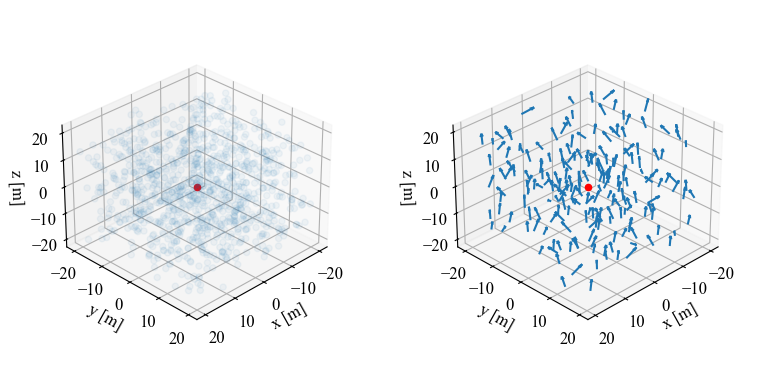

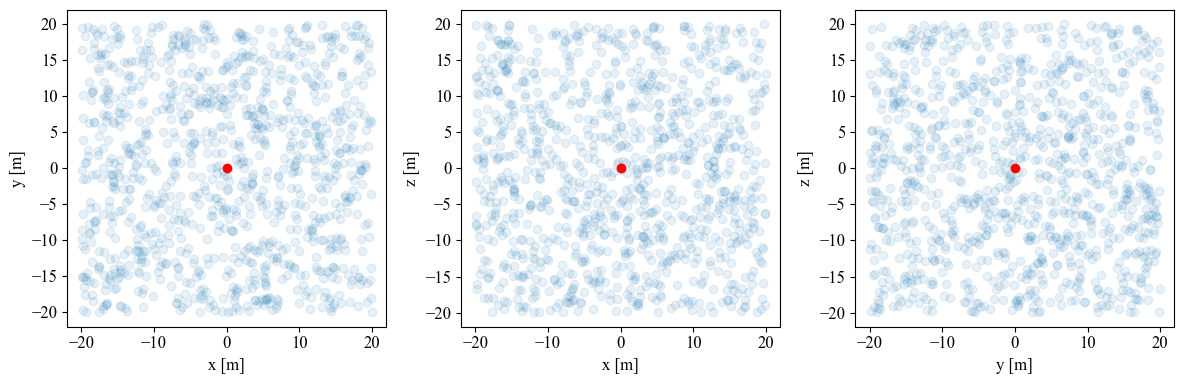

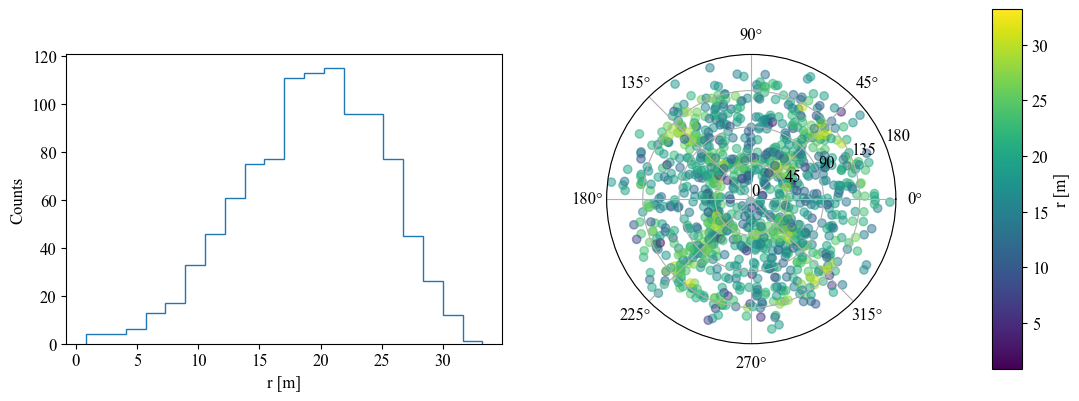

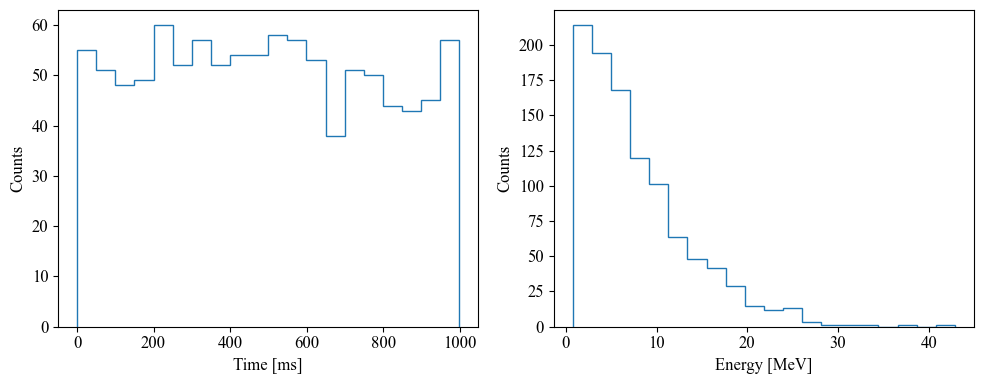

In [12]:
x,y,z,vx,vy,vz,r,phi,theta,t,e = getQuantities(Electron)
plotQuantities(x,y,z,vx,vy,vz,r,phi,theta,t,e)

spherical_variance = 1/len(vx) * np.sqrt(np.sum(vx)**2 + np.sum(vy)**2 + np.sum(vz)**2)
print("Spherical Variance: {:.6f}".format(spherical_variance))

/tmp/ipykernel_48928/3970558882.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Spherical Variance: 0.008268


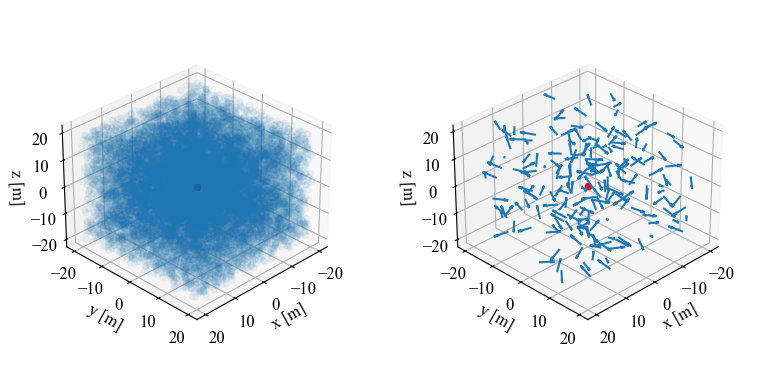

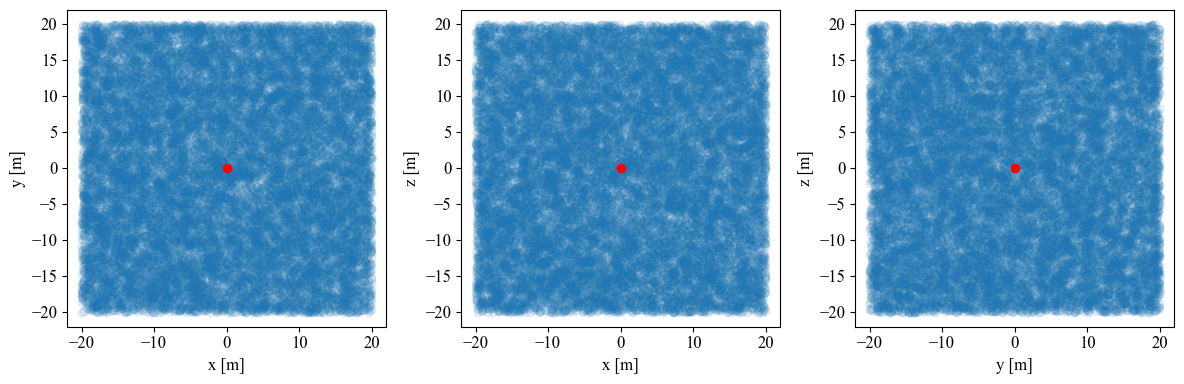

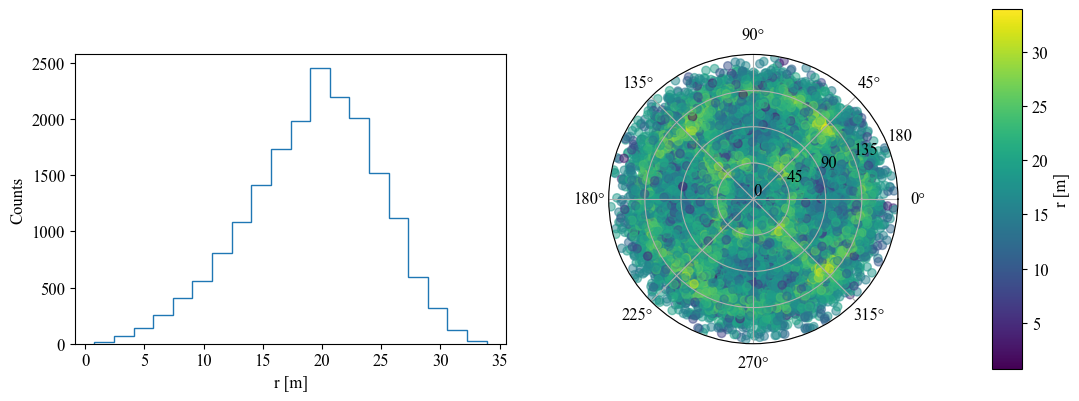

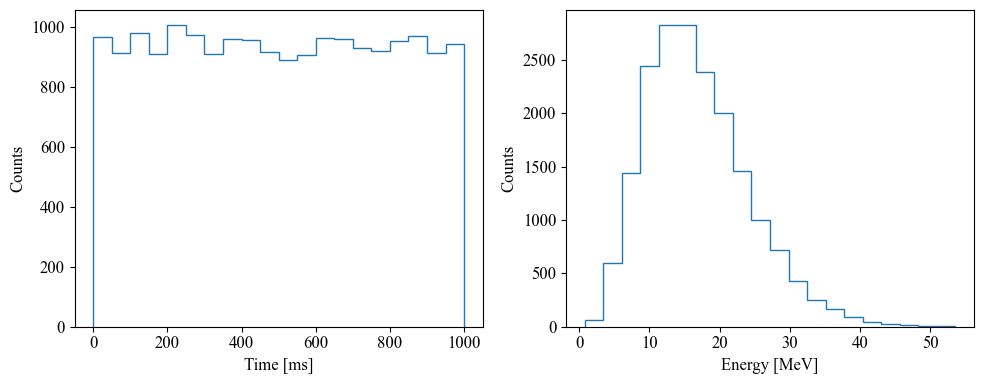

In [13]:
x,y,z,vx,vy,vz,r,phi,theta,t,e = getQuantities(Positron)
plotQuantities(x,y,z,vx,vy,vz,r,phi,theta,t,e)

spherical_variance = 1/len(vx) * np.sqrt(np.sum(vx)**2 + np.sum(vy)**2 + np.sum(vz)**2)
print("Spherical Variance: {:.6f}".format(spherical_variance))

/tmp/ipykernel_48928/3970558882.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Spherical Variance: 0.721847


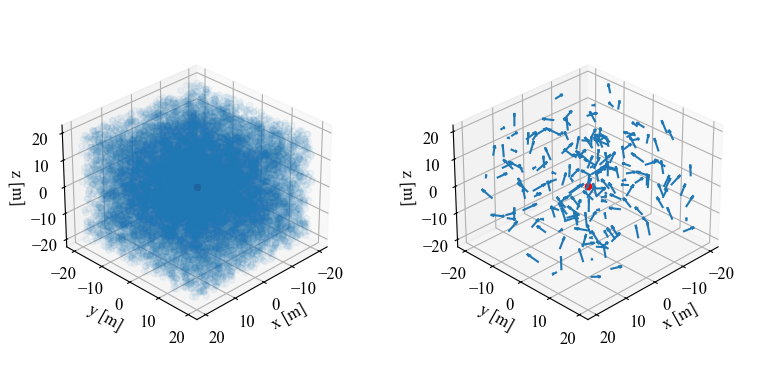

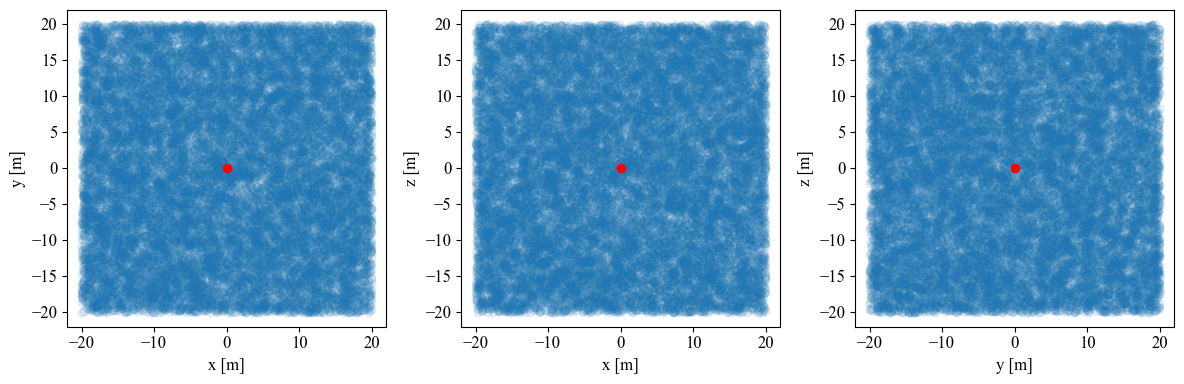

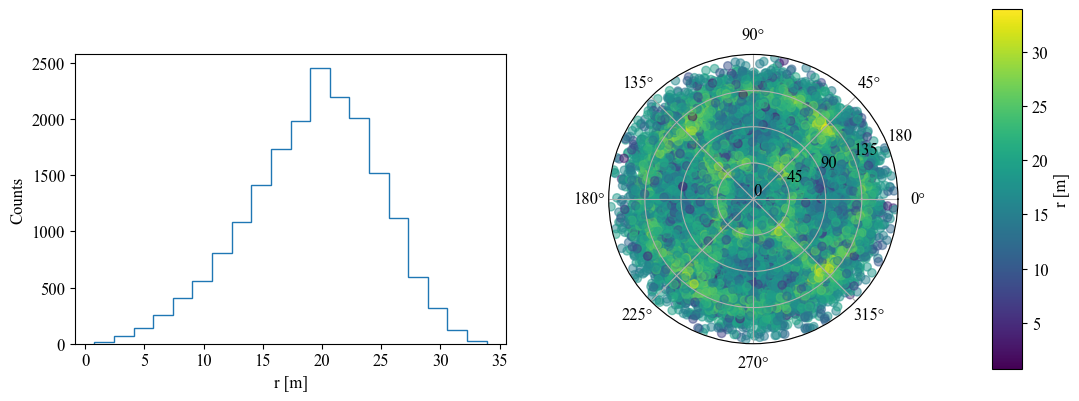

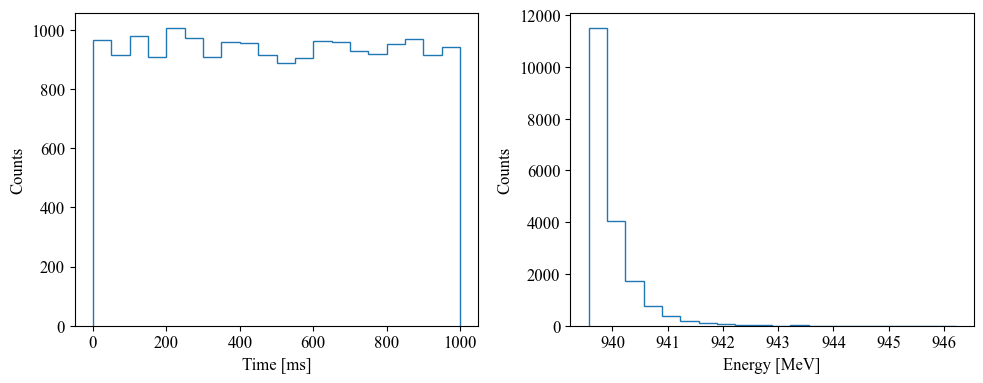

In [14]:
x.shapex,y,z,vx,vy,vz,r,phi,theta,t,e = getQuantities(Neutron)
plotQuantities(x,y,z,vx,vy,vz,r,phi,theta,t,e)

spherical_variance = 1/len(vx) * np.sqrt(np.sum(vx)**2 + np.sum(vy)**2 + np.sum(vz)**2)
print("Spherical Variance: {:.6f}".format(spherical_variance))